### EDA of Boston Housing Price Preiction Dataset

In [63]:
import warnings
warnings.filterwarnings('ignore')

In [64]:
# use this code to read directly from sklearn
 
from sklearn.datasets import load_boston
boston = load_boston()

In [65]:
help(boston)

Help on Bunch in module sklearn.utils._bunch object:

class Bunch(builtins.dict)
 |  Bunch(**kwargs)
 |  
 |  Container object exposing keys as attributes.
 |  
 |  Bunch objects are sometimes used as an output for functions and methods.
 |  They extend dictionaries by enabling values to be accessed by key,
 |  `bunch["value_key"]`, or by an attribute, `bunch.value_key`.
 |  
 |  Examples
 |  --------
 |  >>> from sklearn.utils import Bunch
 |  >>> b = Bunch(a=1, b=2)
 |  >>> b['b']
 |  2
 |  >>> b.b
 |  2
 |  >>> b.a = 3
 |  >>> b['a']
 |  3
 |  >>> b.c = 6
 |  >>> b['c']
 |  6
 |  
 |  Method resolution order:
 |      Bunch
 |      builtins.dict
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __dir__(self)
 |      Default dir() implementation.
 |  
 |  __getattr__(self, key)
 |  
 |  __init__(self, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __setattr__(self, key, value)
 |      Implement setattr(self, name, value).
 |  
 

### Data preparation

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [67]:
# save model

import pickle as pkl

In [68]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [69]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [70]:
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [71]:
data = boston.data

In [72]:
data.shape

(506, 13)

In [73]:
data = pd.DataFrame(data=data, columns=boston.feature_names)
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [74]:
data['Price'] = boston.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Understand you data and plot style setting

In [75]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [76]:
data_desc = data.describe()
data_desc.loc['mean']

CRIM         3.613524
ZN          11.363636
INDUS       11.136779
CHAS         0.069170
NOX          0.554695
RM           6.284634
AGE         68.574901
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.653063
Price       22.532806
Name: mean, dtype: float64

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [78]:
# check null values
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [79]:
# check duplicated values
data.duplicated().sum()

0

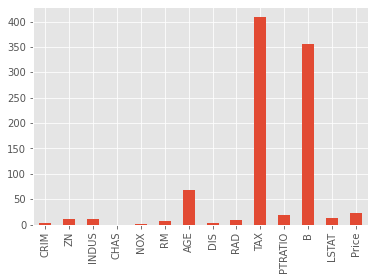

In [80]:
# viz mean features in bar plot
data_desc.loc['mean'].plot.bar();

### Plot Styling

In [81]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [82]:
len(plt.style.available)

28

In [83]:
# chose style

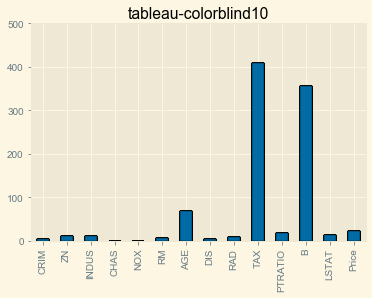

In [84]:
# viz styles plots

for style in plt.style.available:
    plt.style.use(style)
    data_desc.loc['mean'].plot.bar()
    plt.title(style)
    plt.savefig('plots_boston_houses/' + style + ".png")   

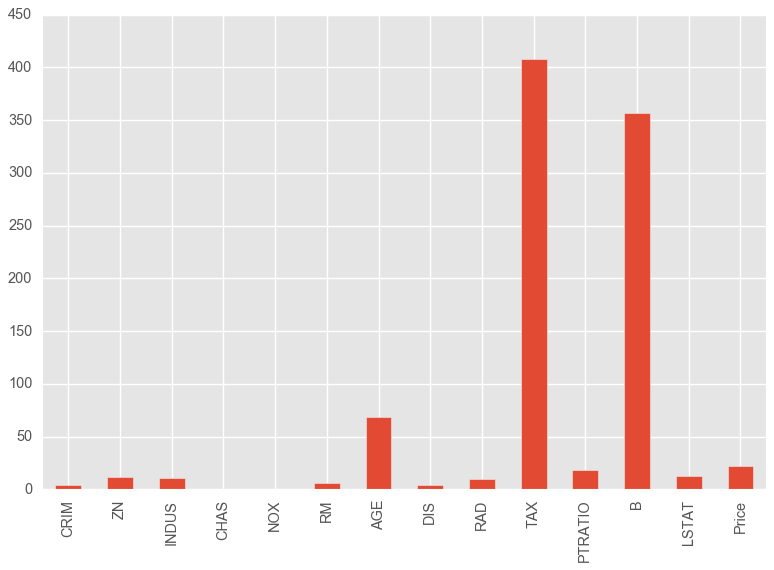

In [85]:
plt.style.use('ggplot')
data_desc.loc['mean'].plot.bar();

### Pair plot

In [86]:
import seaborn as sns

In [87]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [88]:
# correlation features

sns.pairplot(data);

In [ ]:
sns.pairplot(data.iloc[:, np.hstack(([0], range(7, 14)))], diag_kind='kde');

### Distribution Plot

In [ ]:
rows = 2
cols = 7

fig, ax = plt.subplots(nrows= rows, 
                       ncols= cols, 
                       figsize = (16, 4))

col = data.columns
index = 0

for i in range(rows):
    for j in range(cols):
        sns.distplot(data[col[index]],
                    ax = ax[i][j])
        index = index + 1
        
plt.tight_layout()

### Scater Plot

#### Plotting `Price` with remaining columns

In [ ]:
rows = 2
cols = 7 

fig, ax = plt.subplots(rows, 
                       cols,
                       figsize = (16, 4))

col = data.columns
index = 0

for i in range(rows):
    for j in range(cols):
        sns.scatterplot(x = 'Price',
                        y = col[index], 
                        data = data,
                        ax = ax[i][j])
        index = index + 1

plt.tight_layout()
plt.show();

### Heatmap

In [ ]:
corrmat = data.corr()
corrmat

In [ ]:
corrmat.shape

In [ ]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.heatmap(corrmat, 
            annot= True,
            annot_kws= {'size': 7});

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.2, 
            top - 0.2)

plt.show()

### Correlated feature selection

In [ ]:
def getCorrelatedFeature(corrdata, threshold):
    feature = []
    value = []
    
    for i, index in enumerate(corrdata.index):
        if abs(corrdata[index]) > threshold:
            feature.append(index)
            value.append(corrdata[index])
            
    df = pd.DataFrame(data = value,
                   index = feature,
                   columns = ['corr value'])
    
    return df

In [ ]:
threshold = 0.5
corr_df = getCorrelatedFeature(corrmat['Price'], 
                               threshold)

In [ ]:
corr_df

### Heatmap and Pair Plot of Correlated Data

In [ ]:
correlated_data = data[corr_df.index]
correlated_data.head()

In [ ]:
sns.pairplot(correlated_data)
plt.tight_layout()

In [ ]:
fig, ax = plt.subplots(figsize = (4, 4))
sns.heatmap(correlated_data.corr(),
            annot= True,
            annot_kws= {'size': 12})

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5,
            top = - 0.5)

plt.show()

### Box and Rel PLot

In [ ]:
sns.boxplot(y = 'Price',
            x = 'CHAS',
            data = data);

In [ ]:
sns.relplot(x = 'RM', 
            y = 'Price', 
            data = data,
            hue = 'CHAS');

In [ ]:
sns.relplot(x = 'RM', 
            y = 'Price', 
            data = data,
            style = 'CHAS');

In [ ]:
sns.relplot(x = 'RM', 
            y = 'Price', 
            data = data,
            size = 'CHAS');

In [ ]:
sns.relplot(x = 'RM', 
            y = 'Price', 
            data = data,
            col = 'CHAS');

### Join plot

In [ ]:
sns.jointplot(x = data['RM'],
              y = data['Price']);

In [ ]:
sns.jointplot(x = data['RM'],
              y = data['Price'],
              kind = 'hex');

In [ ]:
sns.jointplot(x = data['RM'],
              y = data['Price'],
              kind = 'kde');

In [ ]:
sns.jointplot(data['RM'],
              data['Price'],
              kind = 'kde',
              color = 'm');

In [ ]:
g = sns.jointplot(data['RM'],
              data['Price'],
              kind = 'kde',
              color = 'm')

g.plot_joint(plt.scatter,
             c = 'r',
             s = 40,
             linewidth = 1,
             marker = '+');

In [ ]:
g = sns.jointplot(data['RM'],
              data['Price'],
              kind = 'kde',
              color = 'm')

g.plot_joint(plt.scatter,
             c = 'r',
             s = 40,
             linewidth = 1,
             marker = '+')

g.ax_joint.collections[0].set_alpha(0.3);

In [ ]:
fig, ax = plt.subplots(figsize = (6, 6))

cmap = sns.cubehelix_palette(as_cmap = True,
                             dark = 0,
                             light = 1,
                             reverse = True)

sns.kdeplot(data['RM'],
            data['Price'],
            cmap = cmap,
            n_levels = 60,
            shade = True);

### linear Regression and Relationship

- regplot
- lmplot

In [ ]:
data.head()

In [ ]:
sns.regplot(x = 'RM',
            y = 'Price',
            data = data);

In [ ]:
sns.regplot(x = 'RM',
            y = 'Price',
            data = data,
            robust = True);

In [ ]:
sns.lmplot(x = 'RM',
           y = 'Price',
           data = data);

In [ ]:
sns.lmplot(x = 'RM',
           y = 'Price',
           data = data,
           hue = 'CHAS');

In [ ]:
sns.lmplot(x = 'RM',
           y = 'Price',
           data = data,
           col = 'CHAS');

In [ ]:
sns.lmplot(x = 'RM',
           y = 'Price',
           data = data,
           col = 'CHAS',
           robust = True);

In [ ]:
sns.lmplot(x = 'RM',
           y = 'Price',
           data = data,
           col = 'CHAS',
           order = 2);

In [ ]:
sns.lmplot(x = 'CHAS',
           y = 'Price',
           data = data,
           x_estimator = np.mean);

In [ ]:
%reload_ext watermark
%watermark -a "Caique Miranda" -gu "caiquemiranda" -iv

### End.